In [1]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 60.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 934.3/934.3 kB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 98.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 96.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 122.1 MB/s eta 0:00:00


In [2]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

/usr/local/lib/python3.12/dist-packages/pennylane/__init__.py:209: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.6.2. You have version 0.7.2 installed. Please downgrade JAX to 0.6.2 to avoid runtime errors using python -m pip install jax~=0.6.0 jaxlib~=0.6.0
  warnings.warn(


## H2

In [3]:
# Define the molecule H2
symbols = ["H", "H"]
coordinates = np.array([0.0, 0.0, 0, 0.0, 0.0, 1.4])

# Load the electronic Hamiltonian for H2
H, qubits = qml.qchem.molecular_hamiltonian(
    symbols, coordinates, charge=0, basis="sto-3g"
)

In [4]:
dev = qml.device("default.qubit", wires=qubits)
hf_state = np.array([1, 1, 0, 0], requires_grad=False)

def ansatz(params, wires=[0, 1, 2, 3]):
    for i in wires:
        qml.RZ(params[3 * i], wires=i)
        qml.RY(params[3 * i + 1], wires=i)
        qml.RZ(params[3 * i + 2], wires=i)
    qml.CNOT(wires=[2, 3])
    qml.CNOT(wires=[2, 0])
    qml.CNOT(wires=[3, 1])

In [5]:
@qml.qnode(dev, interface="autograd")
def cost(params):
    ansatz(params)
    return qml.expval(H)

In [6]:
# Initialize parameters
step_size = 0.5
max_iterations = 21
np.random.seed(0)
init_params = np.random.uniform(0, 2 * np.pi, size=12, requires_grad=True)

(<Figure size 900x500 with 1 Axes>, <Axes: >)

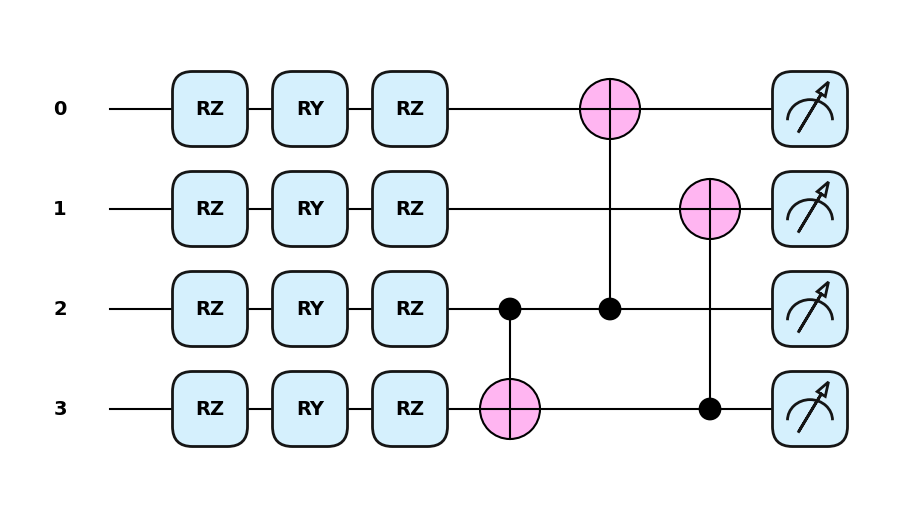

In [7]:
qml.drawer.use_style('pennylane')
qml.draw_mpl(cost)(init_params)

In [8]:
opt = qml.AdamOptimizer(step_size)

params = init_params

gd_cost = []
params_gd = [init_params]
conv_tol = 1e-5

for n in range(max_iterations):
    params, prev_energy = opt.step_and_cost(cost, params)
    gd_cost.append(prev_energy)
    params_gd.append(params)
    energy = cost(params)
    conv = np.abs(energy - prev_energy)

    print(
            "Iteration = {:},  Energy = {:.8f} Ha".format(n, energy)
        )

    if conv <= conv_tol:
        break



# store params and energy
trajectory_adam = np.array(params_gd)
energy_adam = np.array(gd_cost)

Iteration = 0,  Energy = -0.90711981 Ha
Iteration = 1,  Energy = -1.02525346 Ha
Iteration = 2,  Energy = -1.08621300 Ha
Iteration = 3,  Energy = -1.05558165 Ha
Iteration = 4,  Energy = -0.98291816 Ha
Iteration = 5,  Energy = -0.96011343 Ha
Iteration = 6,  Energy = -1.00187459 Ha
Iteration = 7,  Energy = -1.07023002 Ha
Iteration = 8,  Energy = -1.11930015 Ha
Iteration = 9,  Energy = -1.12515826 Ha
Iteration = 10,  Energy = -1.10539093 Ha
Iteration = 11,  Energy = -1.08596819 Ha
Iteration = 12,  Energy = -1.07649667 Ha
Iteration = 13,  Energy = -1.07637683 Ha
Iteration = 14,  Energy = -1.08384714 Ha
Iteration = 15,  Energy = -1.09915337 Ha
Iteration = 16,  Energy = -1.11920177 Ha
Iteration = 17,  Energy = -1.13371303 Ha
Iteration = 18,  Energy = -1.13372867 Ha
Iteration = 19,  Energy = -1.12173563 Ha
Iteration = 20,  Energy = -1.10921900 Ha


In [9]:
opt = qml.GradientDescentOptimizer(step_size)

params = init_params

gd_cost = []
params_gd = [init_params]

for n in range(max_iterations):
    params, prev_energy = opt.step_and_cost(cost, params)
    gd_cost.append(prev_energy)
    params_gd.append(params)
    energy = cost(params)
    conv = np.abs(energy - prev_energy)

    print(
            "Iteration = {:},  Energy = {:.8f} Ha".format(n, energy)
        )

    if conv <= conv_tol:
        break


# store params and energy
trajectory_gd = np.array(params_gd)
energy_grad = np.array(gd_cost)

Iteration = 0,  Energy = -0.63253154 Ha
Iteration = 1,  Energy = -0.74592838 Ha
Iteration = 2,  Energy = -0.84708792 Ha
Iteration = 3,  Energy = -0.92848230 Ha
Iteration = 4,  Energy = -0.98941956 Ha
Iteration = 5,  Energy = -1.03326966 Ha
Iteration = 6,  Energy = -1.06427587 Ha
Iteration = 7,  Energy = -1.08604749 Ha
Iteration = 8,  Energy = -1.10128601 Ha
Iteration = 9,  Energy = -1.11193232 Ha
Iteration = 10,  Energy = -1.11936348 Ha
Iteration = 11,  Energy = -1.12455051 Ha
Iteration = 12,  Energy = -1.12817453 Ha
Iteration = 13,  Energy = -1.13071107 Ha
Iteration = 14,  Energy = -1.13249094 Ha
Iteration = 15,  Energy = -1.13374388 Ha
Iteration = 16,  Energy = -1.13462925 Ha
Iteration = 17,  Energy = -1.13525773 Ha
Iteration = 18,  Energy = -1.13570622 Ha
Iteration = 19,  Energy = -1.13602828 Ha
Iteration = 20,  Energy = -1.13626129 Ha


In [10]:
opt = qml.QNGOptimizer(step_size, lam=0.1, approx="block-diag")

params = init_params
prev_energy = cost(params)
qngd_cost = []
params_qngd = [init_params]
conv_tol = 1e-4

for n in range(max_iterations):
    params, prev_energy = opt.step_and_cost(cost, params)
    qngd_cost.append(prev_energy)
    params_qngd.append(params)
    energy = cost(params)
    conv = np.abs(energy - prev_energy)

    print(
            "Iteration = {:},  Energy = {:.8f} Ha".format(n, energy)
        )

    if conv <= conv_tol:
        break


# store params and energy
trajectory_qng = np.array(params_qngd)
energy_natgrad = np.array(qngd_cost)

Iteration = 0,  Energy = -0.83317462 Ha
Iteration = 1,  Energy = -1.03726078 Ha
Iteration = 2,  Energy = -1.10736792 Ha
Iteration = 3,  Energy = -1.12833977 Ha
Iteration = 4,  Energy = -1.13445061 Ha
Iteration = 5,  Energy = -1.13630821 Ha
Iteration = 6,  Energy = -1.13690691 Ha
Iteration = 7,  Energy = -1.13711485 Ha
Iteration = 8,  Energy = -1.13719489 Ha


In [11]:
# Initialize counters and result storage
iteration = 0
energy_cobyla = []
trajectory_cobyla = []

# Cost wrapper to force logging every iteration
def cost_wrapper(theta):
    global iteration

    # Compute energy
    energy = cost(theta)

    # Store data
    energy_cobyla.append(energy)
    trajectory_cobyla.append(np.copy(theta))

    # Print forced iteration log
    print(f"Iteration {iteration}: Energy = {energy}")

    iteration += 1

    return energy


# Run COBYLA but replace cost with wrapper
result = minimize(
    cost_wrapper,
    init_params,
    method="COBYLA",
    options={"maxiter": max_iterations}
)

# Convert list -> numpy array
energy_cobyla = np.array(energy_cobyla)
trajectory_cobyla = np.array(trajectory_cobyla)

# Print final result
print("\nOptimized Parameters:", result.x)
print("Optimized Energy:", result.fun)
print("Total iterations recorded:", len(energy_cobyla))


Iteration 0: Energy = -0.519568291070218
Iteration 1: Energy = -0.5195682910702177
Iteration 2: Energy = -0.2694219435466651
Iteration 3: Energy = -0.5195682910702176
Iteration 4: Energy = -0.5195682910702176
Iteration 5: Energy = -0.5157253405794074
Iteration 6: Energy = -0.5195682910702178
Iteration 7: Energy = -0.5195682910702177
Iteration 8: Energy = -0.556138776302418
Iteration 9: Energy = -0.55832189331354
Iteration 10: Energy = -0.5583218933135402
Iteration 11: Energy = -0.7725119556925433
Iteration 12: Energy = -0.7725119556925433
Iteration 13: Energy = -0.8995837878275895
Iteration 14: Energy = -0.6479160357278339
Iteration 15: Energy = -0.8103494901042891
Iteration 16: Energy = -0.959926694064235
Iteration 17: Energy = -0.9923454875740522
Iteration 18: Energy = -0.8818088334878298
Iteration 19: Energy = -0.9923454875740514
Iteration 20: Energy = -0.8533424352850023

Optimized Parameters: [3.44829694 2.83962153 3.78727399 3.42360201 3.11363376 4.0582724
 2.74944154 6.80523805 

In [12]:
# Initialize iteration counter and result storage
iteration = 0
energy_nelmead = []  # Array to store energy results
trac_nelmead = [init_params]

# Define a callback function to print results each iteration and store energies
def callback(theta):
    global iteration
    energy = cost(theta)
    energy_nelmead.append(energy)  # Store energy in array
    trac_nelmead.append(theta)  # Store params in array
    print(f"Iteration {iteration}: Energy: {energy}")
    iteration += 1

# Run the optimization with COBYLA
result = minimize(cost, init_params, method="Nelder-Mead", callback=callback, options={"maxiter": max_iterations+1})

#store numpy params result
energy_nelmead = np.array(energy_nelmead)
trac_nelmead = np.array(trac_nelmead)

# Print final optimized parameters and energy
print("\nOptimized Parameters:", result.x)
print("Optimized Energy:", result.fun)

Iteration 0: Energy: -0.6700420942161212
Iteration 1: Energy: -0.6700420942161212
Iteration 2: Energy: -0.6700420942161212
Iteration 3: Energy: -0.6700420942161212
Iteration 4: Energy: -0.6700420942161212
Iteration 5: Energy: -0.6700420942161212
Iteration 6: Energy: -0.6700420942161212
Iteration 7: Energy: -0.6700420942161212
Iteration 8: Energy: -0.7427096213161019
Iteration 9: Energy: -0.7427096213161019
Iteration 10: Energy: -0.7427096213161019
Iteration 11: Energy: -0.7427096213161019
Iteration 12: Energy: -0.7427096213161019
Iteration 13: Energy: -0.8294688887728364
Iteration 14: Energy: -0.8294688887728364
Iteration 15: Energy: -0.8294688887728364
Iteration 16: Energy: -0.8294688887728364
Iteration 17: Energy: -0.9351407219375427
Iteration 18: Energy: -0.9351407219375427
Iteration 19: Energy: -0.9351407219375427
Iteration 20: Energy: -0.9351407219375427

Optimized Parameters: [3.41769841 3.61949164 3.77255733 3.37917738 2.79077011 4.04646296
 2.77084015 5.93300796 6.27415996 2.35

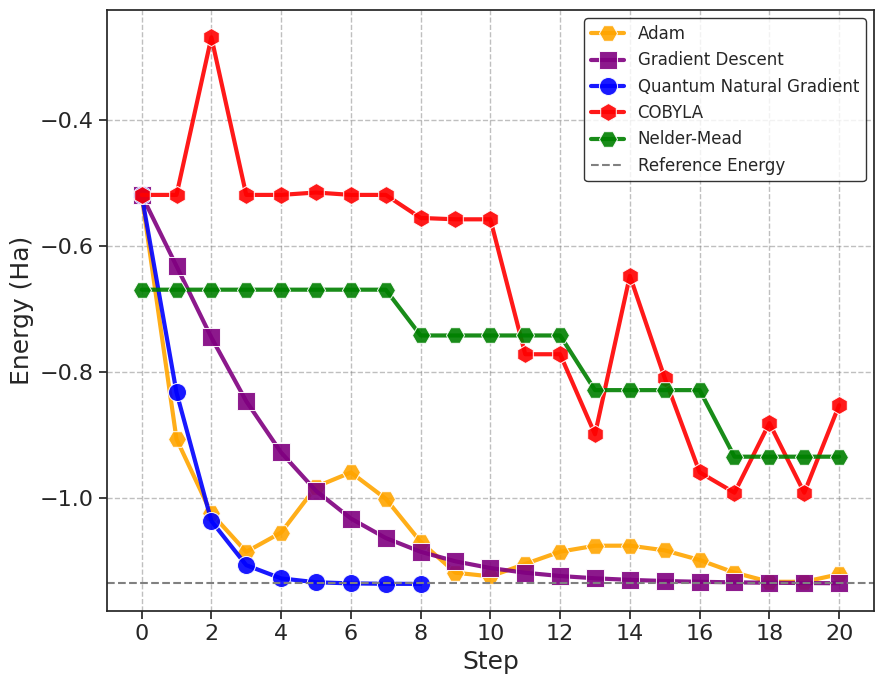

In [13]:
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle

# Iteration index for energy convergence comparison
iterations = np.arange(max_iterations)

energy_natgrad = energy_natgrad
energy_grad = energy_grad
energy_cobyla = energy_cobyla
energy_nelmead = energy_nelmead
energy_adam = energy_adam

sns.set(style="ticks")

# Energy convergence of different optimization algorithms
fig, ax1 = plt.subplots(figsize=(9, 7))

sns.lineplot(x=iterations, y=energy_adam, label="Adam", marker='H',
             color='orange', linewidth=3, markersize=13, alpha=0.9, ax=ax1)
sns.lineplot(x=iterations, y=energy_grad, label="Gradient Descent", marker='s',
             color='purple', linewidth=3, markersize=13, alpha=0.9, ax=ax1)
sns.lineplot(x=np.arange(len(energy_natgrad)), y=energy_natgrad,
             label="Quantum Natural Gradient", marker='o',
             color='blue', linewidth=3, markersize=13, alpha=0.9, ax=ax1)
sns.lineplot(x=iterations, y=energy_cobyla, label="COBYLA", marker='h',
             color='red', linewidth=3, markersize=13, alpha=0.9, ax=ax1)
sns.lineplot(x=iterations, y=energy_nelmead, label="Nelder-Mead", marker='H',
             color='green', linewidth=3, markersize=13, alpha=0.9, ax=ax1)

ax1.set_xlabel("Step", fontsize=18)
ax1.set_ylabel("Energy (Ha)", fontsize=18)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)

# Reference ground-state energy
ax1.axhline(y=-1.136, color='gray', linestyle='--', label="Reference Energy")

ax1.grid(True, linestyle='--', color='gray', alpha=0.5)
ax1.set_xticks(np.arange(0, max_iterations, 2))

# Final figure formatting and export
plt.legend(frameon=True, edgecolor='black', facecolor='white', fontsize=12)
plt.savefig('energy_plots_H2_4qubit.png', bbox_inches='tight')
plt.tight_layout()
plt.show()


In [14]:
import seaborn as sns

params = init_params
mt_fn = qml.metric_tensor(cost, approx='block-diag')

# Selected diagonal elements of the metric tensor to be tracked
tracked_elements = [(8, 8), (2, 2), (5, 5), (11, 11)]
element_labels = [f"$g[{i},{j}]$" for (i, j) in tracked_elements]

tracked_array = []

# Optimization loop with metric tensor evaluation at each step
for n in range(len(energy_natgrad)):
    params = opt.step(cost, params)
    metric_tensor = mt_fn(params)

    row_values = [metric_tensor[i, j] for (i, j) in tracked_elements]
    tracked_array.append(row_values)

    print(f"\n=== Iteration {n} ===")
    for i in range(0, len(row_values), 4):
        row_label = element_labels[i:i+4]
        row_data = row_values[i:i+4]
        print(" | ".join(
            f"{label}: {val:.6f}" for label, val in zip(row_label, row_data)
        ))

# Collected metric tensor elements across iterations
tracked_array = np.array(tracked_array)



=== Iteration 0 ===
$g[8,8]$: 0.035811 | $g[2,2]$: 0.170897 | $g[5,5]$: 0.029326 | $g[11,11]$: 0.141363

=== Iteration 1 ===
$g[8,8]$: 0.009431 | $g[2,2]$: 0.082663 | $g[5,5]$: 0.010671 | $g[11,11]$: 0.043472

=== Iteration 2 ===
$g[8,8]$: 0.009869 | $g[2,2]$: 0.031378 | $g[5,5]$: 0.003334 | $g[11,11]$: 0.008927

=== Iteration 3 ===
$g[8,8]$: 0.011764 | $g[2,2]$: 0.010678 | $g[5,5]$: 0.001040 | $g[11,11]$: 0.001590

=== Iteration 4 ===
$g[8,8]$: 0.012168 | $g[2,2]$: 0.003476 | $g[5,5]$: 0.000328 | $g[11,11]$: 0.000271

=== Iteration 5 ===
$g[8,8]$: 0.012350 | $g[2,2]$: 0.001115 | $g[5,5]$: 0.000104 | $g[11,11]$: 0.000046

=== Iteration 6 ===
$g[8,8]$: 0.012428 | $g[2,2]$: 0.000356 | $g[5,5]$: 0.000033 | $g[11,11]$: 0.000008

=== Iteration 7 ===
$g[8,8]$: 0.012470 | $g[2,2]$: 0.000113 | $g[5,5]$: 0.000011 | $g[11,11]$: 0.000001

=== Iteration 8 ===
$g[8,8]$: 0.012496 | $g[2,2]$: 0.000036 | $g[5,5]$: 0.000003 | $g[11,11]$: 0.000000


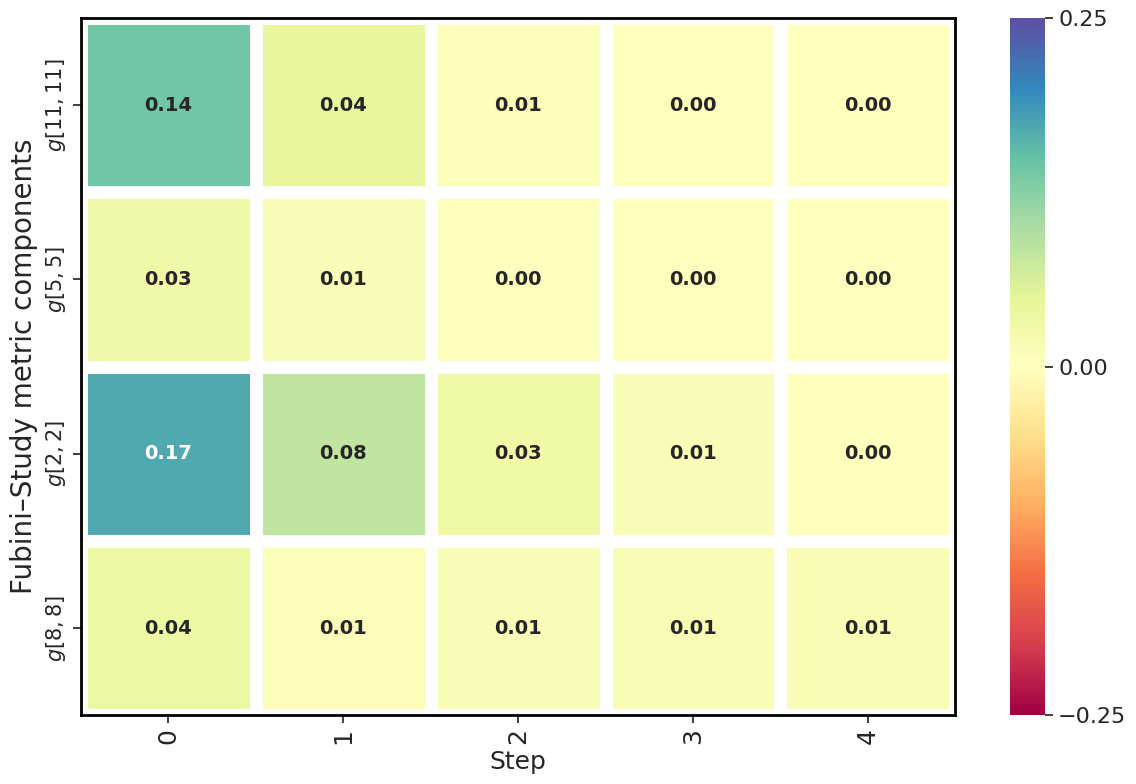

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Limit the number of optimization steps visualized
n_iter = 5
tracked_array = tracked_array[:n_iter]

# Symmetric color scale centered at zero
vmin = -0.25
vmax = 0.25

plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    tracked_array.T,
    cmap='Spectral',
    cbar=True,
    cbar_kws={"shrink": 1, "ticks": [vmin, 0, vmax]},
    linewidths=9,
    linecolor='white',
    annot=True,
    fmt='.2f',
    annot_kws={"size": 14, "weight": 'bold'},
    vmin=vmin,
    vmax=vmax
)

# Emphasize plot boundaries for clear matrix separation
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(2)
    spine.set_color('black')

ax.set_xticks(np.arange(n_iter) + 0.5)
ax.set_xticklabels(np.arange(n_iter), rotation=90, fontsize=18)
ax.set_yticks(np.arange(len(element_labels)) + 0.5)
ax.set_yticklabels(element_labels, fontsize=15)

ax.set_xlabel('Step', fontsize=18)
ax.set_ylabel('Fubini–Study metric components', fontsize=20)
ax.invert_yaxis()

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_aspect(40)

plt.tight_layout()
plt.show()


Trajectory

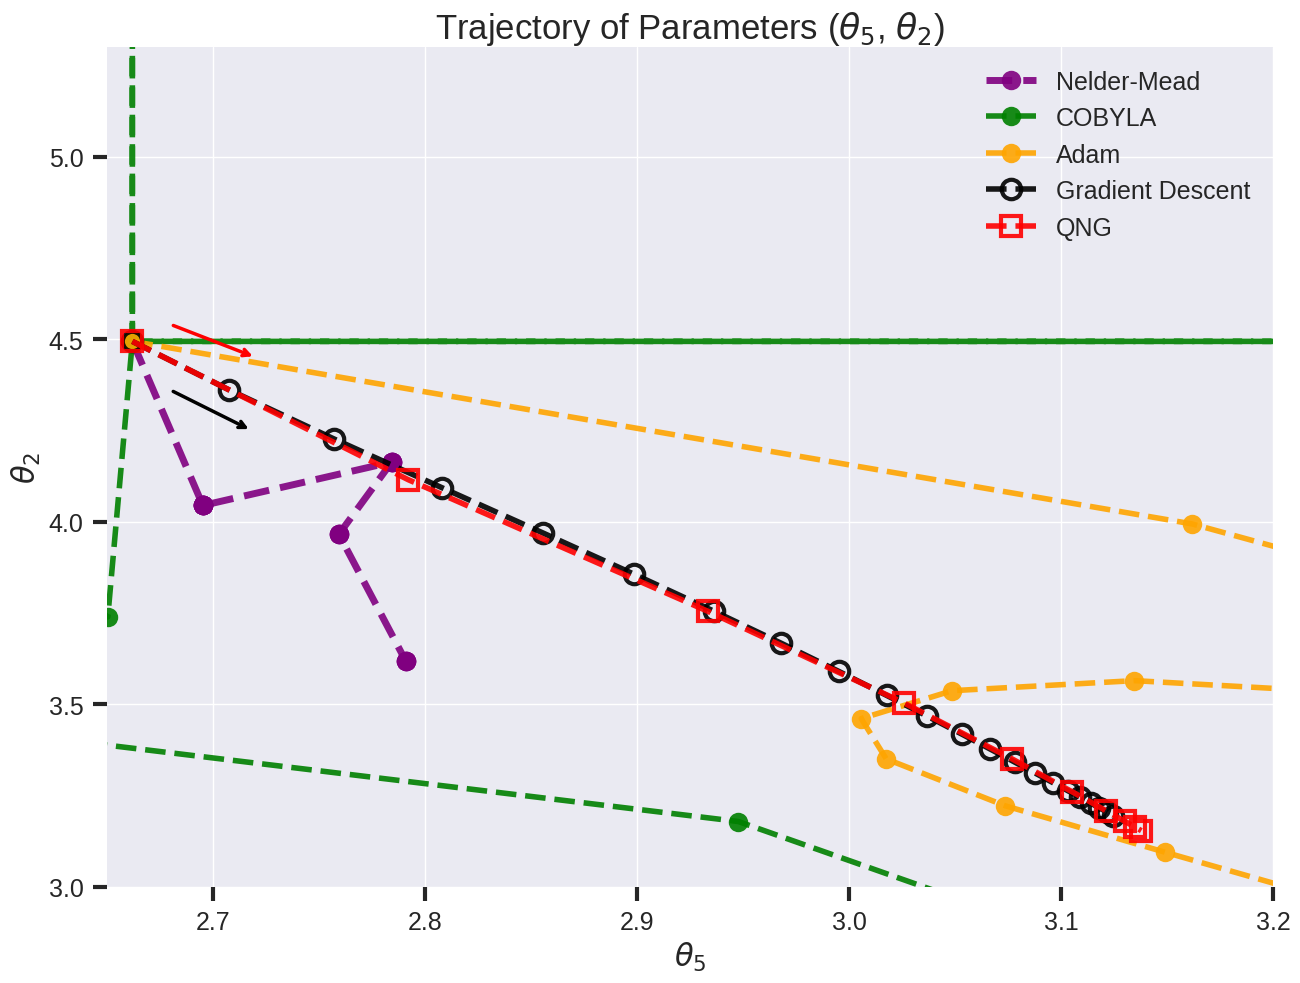

In [16]:
# Trajectory of optimization parameters (θ5, θ2)
plt.figure(figsize=(25, 10))
plt.style.use("seaborn-v0_8")

plt.subplot(1, 2, 1)

plt.plot(trac_nelmead[:, 4], trac_nelmead[:, 1],
         label="Nelder-Mead", linestyle="--", linewidth=5,
         markersize=14, alpha=0.9, marker='o', color="purple")

plt.plot(trajectory_cobyla[:, 4], trajectory_cobyla[:, 1],
         label="COBYLA", linestyle="--", linewidth=4,
         markersize=14, alpha=0.9, marker='o', color="green")

plt.plot(trajectory_adam[:, 4], trajectory_adam[:, 1],
         label="Adam", linestyle='--', linewidth=4,
         markersize=14, alpha=0.9, marker='o', color="orange")

plt.plot(trajectory_gd[:, 4], trajectory_gd[:, 1],
         label="Gradient Descent", linestyle='--', linewidth=4,
         markersize=14, alpha=0.9, marker='o',
         markerfacecolor='none', markeredgewidth=3, color="black")

plt.plot(trajectory_qng[:, 4], trajectory_qng[:, 1],
         label="QNG", linestyle='--', linewidth=4,
         markersize=14, alpha=0.9, marker='s',
         markerfacecolor='none', markeredgewidth=3, color="red")

# Arrows indicating the initial direction of QNG updates
plt.annotate("", xy=(2.72, 4.45), xytext=(2.68, 4.54),
             arrowprops=dict(arrowstyle="->", color="red", lw=2.5))
plt.annotate("", xy=(2.718, 4.25), xytext=(2.68, 4.36),
             arrowprops=dict(arrowstyle="->", color="black", lw=2.5))

# Axis labels and parameter domain
plt.xlabel(r"$\theta_5$", fontsize=22)
plt.ylabel(r"$\theta_2$", fontsize=22)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tick_params(width=3, length=10)

plt.xlim(2.65, 3.2)
plt.ylim(3.0, 5.3)

plt.title("Trajectory of Parameters ($\\theta_5$, $\\theta_2$)", fontsize=25)
plt.legend(fontsize=18)

plt.tight_layout()
plt.show()


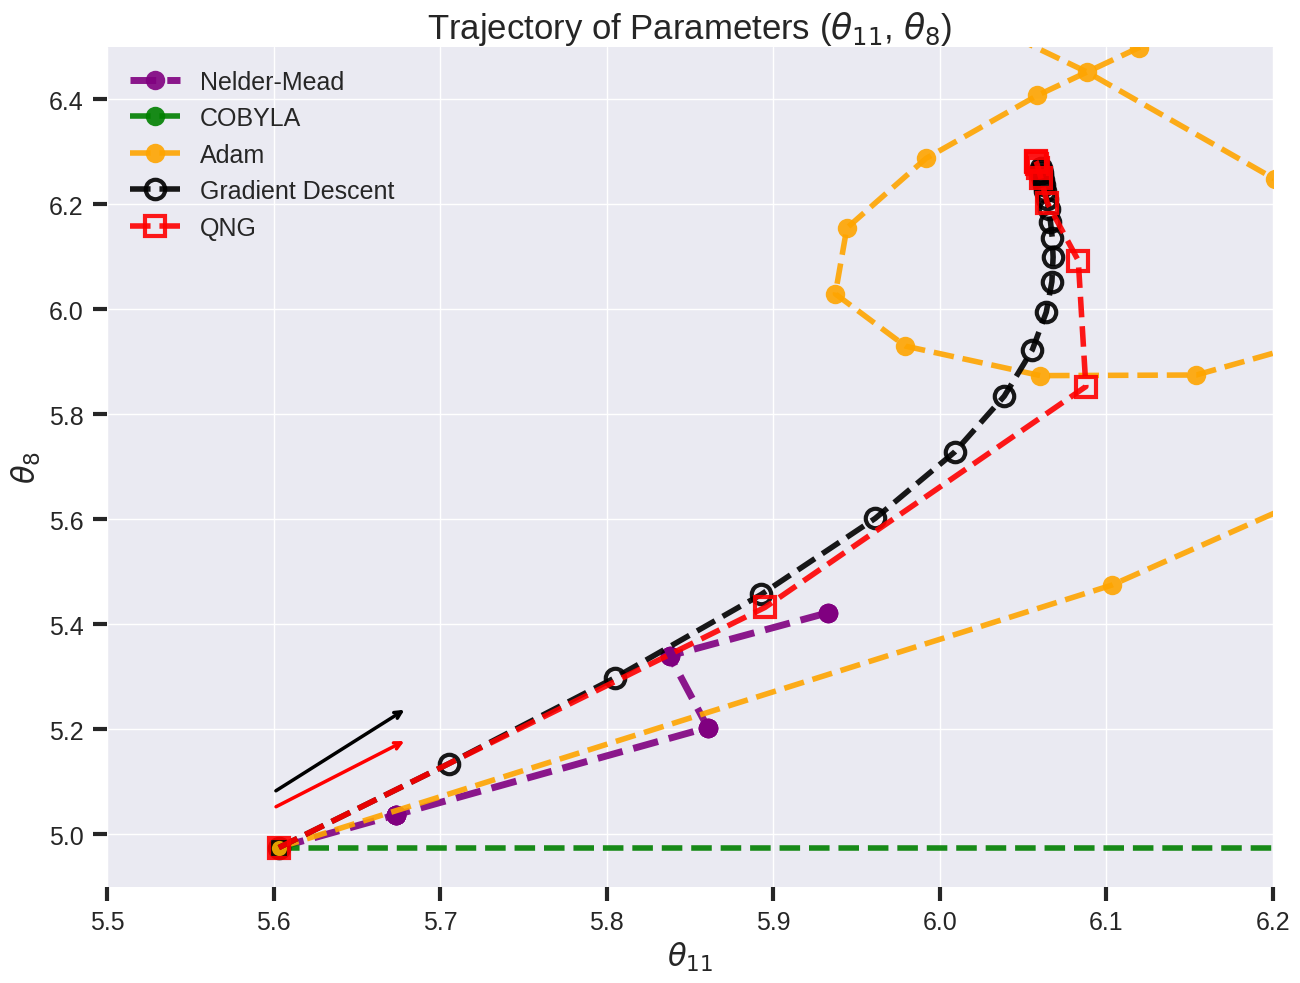

In [17]:
# Trajectory of optimization parameters (θ11, θ8)
plt.figure(figsize=(25, 10))
plt.style.use("seaborn-v0_8")

plt.subplot(1, 2, 1)

plt.plot(trac_nelmead[:, 7], trac_nelmead[:, 10],
         label="Nelder-Mead", linestyle="--", linewidth=5,
         markersize=14, alpha=0.9, marker='o', color="purple")

plt.plot(trajectory_cobyla[:, 7], trajectory_cobyla[:, 10],
         label="COBYLA", linestyle="--", linewidth=4,
         markersize=14, alpha=0.9, marker='o', color="green")

plt.plot(trajectory_adam[:, 7], trajectory_adam[:, 10],
         label="Adam", linestyle='--', linewidth=4,
         markersize=14, alpha=0.9, marker='o', color="orange")

plt.plot(trajectory_gd[:, 7], trajectory_gd[:, 10],
         label="Gradient Descent", linestyle='--', linewidth=4,
         markersize=14, alpha=0.9, marker='o',
         markerfacecolor='none', markeredgewidth=3, color="black")

plt.plot(trajectory_qng[:, 7], trajectory_qng[:, 10],
         label="QNG", linestyle='--', linewidth=4,
         markersize=14, alpha=0.9, marker='s',
         markerfacecolor='none', markeredgewidth=3, color="red")

# Arrows indicating the initial update direction of QNG
plt.annotate("", xy=(5.68, 5.18), xytext=(5.6, 5.05),
             arrowprops=dict(arrowstyle="->", color="red", lw=2.5))
plt.annotate("", xy=(5.68, 5.24), xytext=(5.6, 5.08),
             arrowprops=dict(arrowstyle="->", color="black", lw=2.5))

# Axis labels and parameter domain
plt.xlabel(r"$\theta_{11}$", fontsize=22)
plt.ylabel(r"$\theta_8$", fontsize=22)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tick_params(width=3, length=10)

plt.xlim(5.5, 6.2)
plt.ylim(4.9, 6.5)

plt.title("Trajectory of Parameters ($\\theta_{11}$, $\\theta_8$)", fontsize=25)
plt.legend(fontsize=18)

plt.tight_layout()
plt.show()
